In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

**Here,we are loading dataset MNIST and spliting data into train and test**

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Here, we are going to show number present at X_train array at position 2**

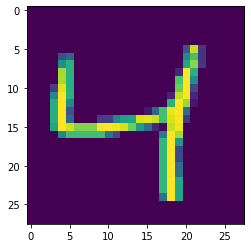

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255
#converting values in range of 0 to 1 for neural network

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Here,we are defining model**

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

**Here, we are running epochs and spliting validation data randonmly from each iteration(epochs)**

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2896 - accuracy: 0.9157 - val_loss: 0.1611 - val_accuracy: 0.9524
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9621 - val_loss: 0.1124 - val_accuracy: 0.9665
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9743 - val_loss: 0.0981 - val_accuracy: 0.9729
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0861 - val_accuracy: 0.9758
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.1169 - val_accuracy: 0.9651
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0381 - accuracy: 0.9872 - val_loss: 0.1011 - val_accuracy: 0.9719
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.0963 - val_accuracy:

**Here, we are predicting probabilities via our trained model for test set**

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


**Here, we are storing max probabilities from predicted values above**

In [ ]:
y_pred = y_prob.argmax(axis=1)

**Here, we are calculating accuracy of our model**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9794

**Here, we are plotting to check if there is overfitting/underfitting or not**

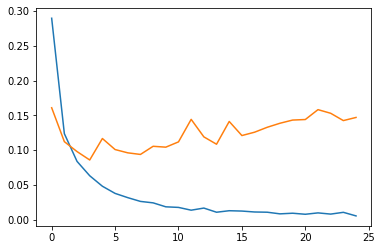

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

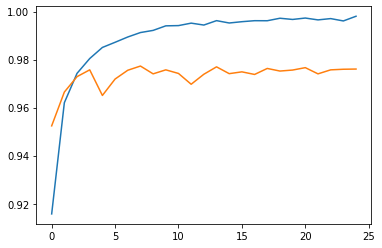

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**Now, we are checking how our model is working as firstly we are checking what digit is stored at a particular position of array of X_test as image**

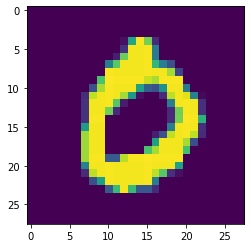

In [ ]:
plt.imshow(X_test[3])

**Now,we are simply just passing that array value in our trained model to predict and argmax(axis=1) returns digit having max probability from predicted values for passed image**

In [ ]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([0])